In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Decision_Tree\\company_data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.shape

(400, 11)

In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [8]:
## To convert object variable intp int64
df.ShelveLoc.replace(('Bad','Good','Medium'),(0,1,2),inplace=True)
df.Urban.replace(('Yes','No'),(0,1),inplace=True)
df.US.replace(('Yes','No'),(0,1),inplace=True)

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,0,0
1,11.22,111,48,16,260,83,1,65,10,0,0
2,10.06,113,35,10,269,80,2,59,12,0,0
3,7.40,117,100,4,466,97,2,55,14,0,0
4,4.15,141,64,3,340,128,0,38,13,0,1


In [10]:
columns=df.iloc[:,1:].columns
columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [11]:
df.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [12]:
df.Urban.value_counts()

0    282
1    118
Name: Urban, dtype: int64

In [13]:
df.US.value_counts()

0    258
1    142
Name: US, dtype: int64

In [14]:
from sklearn.preprocessing import Binarizer

In [15]:
bin=Binarizer(threshold=7.49)

In [16]:
col=df['Sales'].values
col=col.reshape(-1,1)

In [17]:
col

array([[ 9.5 ],
       [11.22],
       [10.06],
       [ 7.4 ],
       [ 4.15],
       [10.81],
       [ 6.63],
       [11.85],
       [ 6.54],
       [ 4.69],
       [ 9.01],
       [11.96],
       [ 3.98],
       [10.96],
       [11.17],
       [ 8.71],
       [ 7.58],
       [12.29],
       [13.91],
       [ 8.73],
       [ 6.41],
       [12.13],
       [ 5.08],
       [ 5.87],
       [10.14],
       [14.9 ],
       [ 8.33],
       [ 5.27],
       [ 2.99],
       [ 7.81],
       [13.55],
       [ 8.25],
       [ 6.2 ],
       [ 8.77],
       [ 2.67],
       [11.07],
       [ 8.89],
       [ 4.95],
       [ 6.59],
       [ 3.24],
       [ 2.07],
       [ 7.96],
       [10.43],
       [ 4.12],
       [ 4.16],
       [ 4.56],
       [12.44],
       [ 4.38],
       [ 3.91],
       [10.61],
       [ 1.42],
       [ 4.42],
       [ 7.91],
       [ 6.92],
       [ 4.9 ],
       [ 6.85],
       [11.91],
       [ 0.91],
       [ 5.42],
       [ 5.21],
       [ 8.32],
       [ 7.32],
       [

In [18]:
x1=df.iloc[:,1:]
y1=bin.fit_transform(col)

<ipython-input-19-ec26331cf652>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x1,y1)


[0.10172651 0.08932576 0.10489629 0.08222831 0.21566587 0.14814749
 0.12108704 0.08123837 0.03037393 0.02531044]


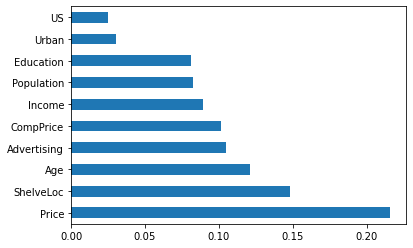

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [20]:
df.drop(['US'],axis=1,inplace=True)
df.drop(['Urban'],axis=1,inplace=True)
df.drop(['Education'],axis=1,inplace=True)


In [21]:
y=y1

In [23]:

x_=df.iloc[:,1:6]
x=x_.values
x

array([[138,  73,  11, 276, 120],
       [111,  48,  16, 260,  83],
       [113,  35,  10, 269,  80],
       ...,
       [162,  26,  12, 368, 159],
       [100,  79,   7, 284,  95],
       [134,  37,   0,  27, 120]], dtype=int64)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [25]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [26]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [27]:
pred1=model.predict(x_train)
np.mean(pred1==y_test)

0.496875

In [28]:
pred2=model.predict(x_test)
np.mean(pred2==y_test)


0.496875

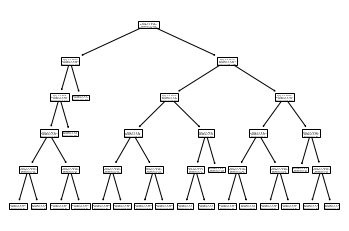

In [29]:
tree.plot_tree(model);

In [30]:
pd.Series(pred1).value_counts()

0.0    168
1.0    152
dtype: int64

In [31]:
pd.Series(pred2).value_counts()

0.0    42
1.0    38
dtype: int64

In [32]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=8)

In [33]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [34]:
pred3=model_gini.predict(x_train)
np.mean(pred3==y_train)

0.5019921875

In [35]:
pred4=model_gini.predict(x_test)
np.mean(pred4==y_test)

0.5015625